**Step 1: Import Required Libraries**

**Group Members:**

 1)Shravan Bobade (202201070067)

 2)Neha More (202201070068)

 3)Sapna Dahikamble (202201070065)

 4) kanchan Sanap (202201070070)

 5)Sejal Sinhe (202201070070)

**Problem Statement :**Heart Disease Prediction Using Machine Learning

**Step 1: Import Required Libraries**

In [1]:


# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

**Step 2: Load the Dataset**

In [ ]:

file_path = 'HeartDiseaseTrain-Test.csv'  # Ensure to upload this file in Colab
heart_data = pd.read_csv('/content/HeartDiseaseTrain-Test (1) (1) (1).csv')
print("Dataset Info:")


Dataset Info:


In [ ]:
print(heart_data.info())
print("\nFirst 5 rows of the dataset:")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

**Step 3: Exploratory Data Analysis (EDA)**

In [ ]:
print(heart_data.head())
print("\nMissing Values in Dataset:")


   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [ ]:
print(heart_data.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


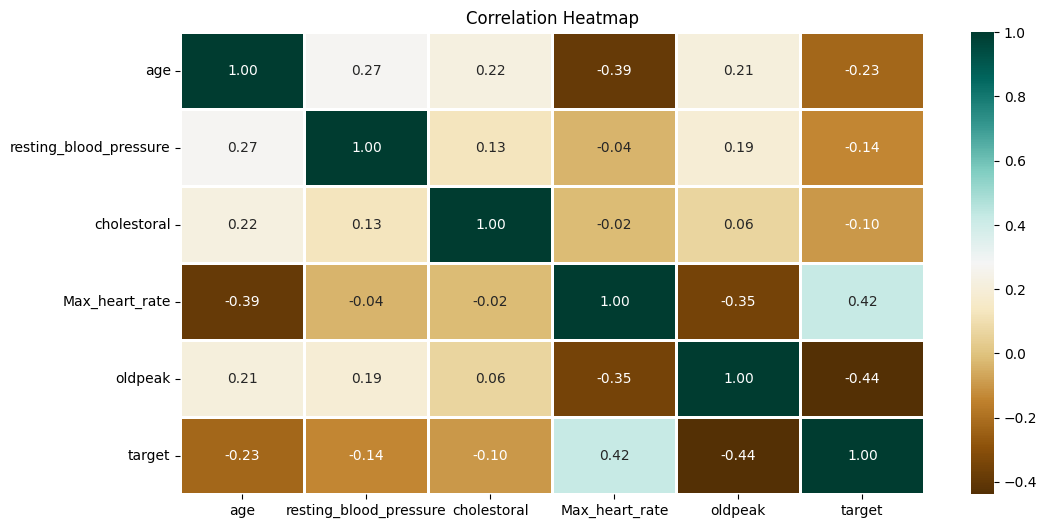

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Correlation Heatmap
non_numeric_cols = heart_data.select_dtypes(exclude=np.number).columns
plt.figure(figsize=(12, 6))
sns.heatmap(heart_data.drop(columns=non_numeric_cols).corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title("Correlation Heatmap")
plt.show()

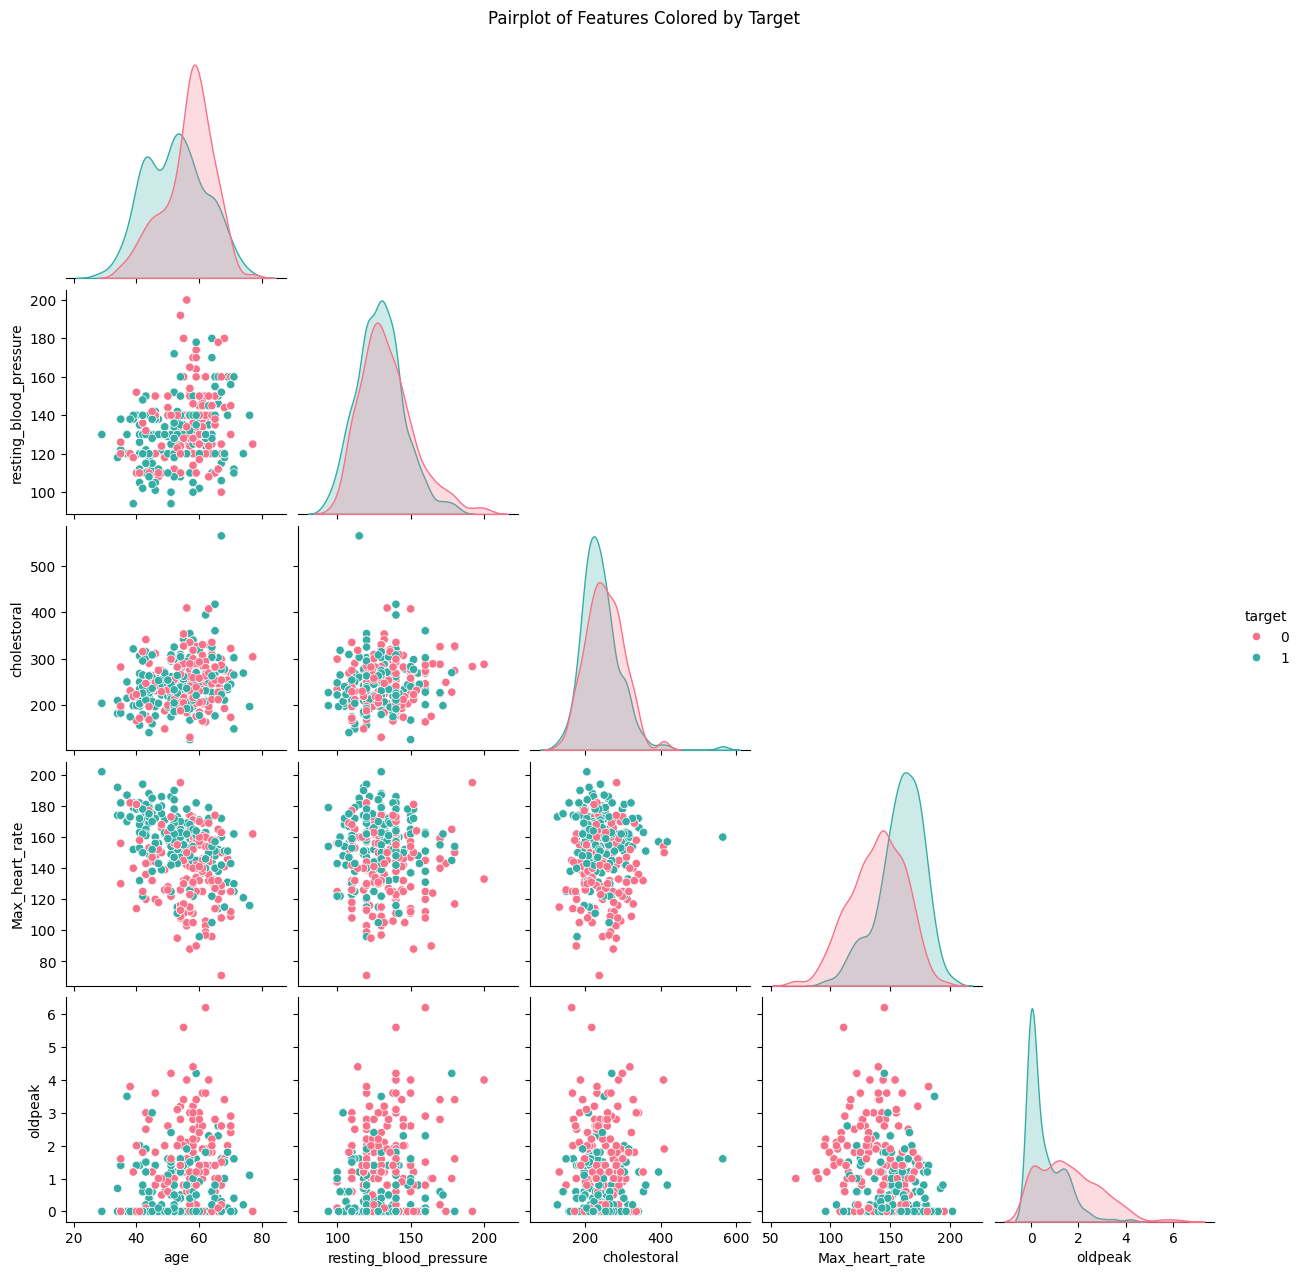

In [ ]:
# Pairplot
sns.pairplot(heart_data, hue='target', diag_kind='kde', palette='husl', corner=True)
plt.suptitle("Pairplot of Features Colored by Target", y=1.02)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

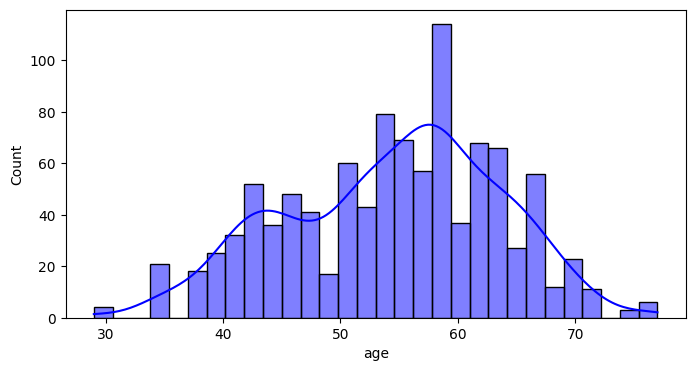

In [ ]:
# Univariate Analysis
plt.figure(figsize=(8, 4))
sns.histplot(heart_data['age'], kde=True, bins=30, color='blue')


Text(0.5, 1.0, 'Distribution of Age')

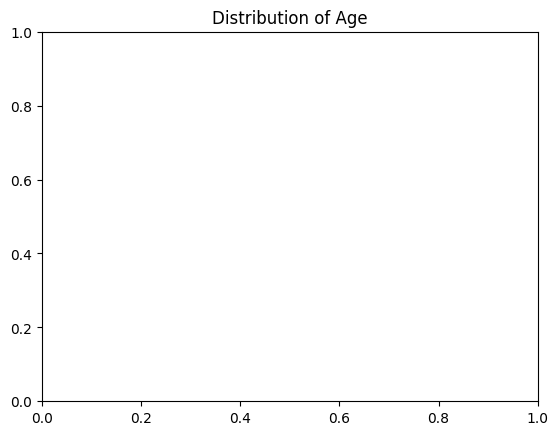

In [ ]:
plt.title("Distribution of Age")


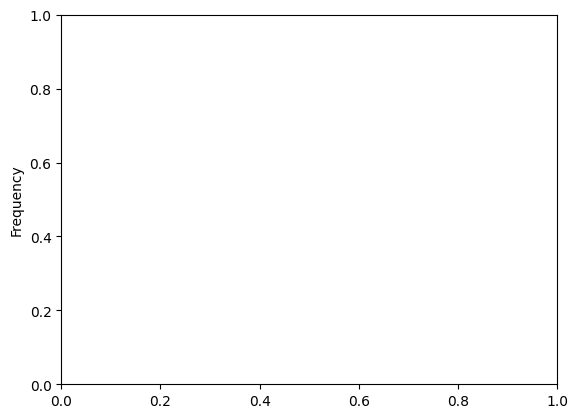

In [ ]:
plt.ylabel("Frequency")
plt.show()

**# Step 4: Data Cleaning and Preprocessing**

In [ ]:

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
numerical_columns = heart_data.select_dtypes(include=np.number).columns
heart_data[numerical_columns] = imputer.fit_transform(heart_data[numerical_columns])

In [ ]:
# Encode Categorical Features
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                        'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
label_encoders = {}
for col in categorical_features:
    encoder = LabelEncoder()
    heart_data[col] = encoder.fit_transform(heart_data[col])
    label_encoders[col] = encoder

In [ ]:
# Scale Features
scaler = StandardScaler()
heart_data[numerical_columns] = scaler.fit_transform(heart_data[numerical_columns])

In [ ]:
# Split Dataset
X = heart_data.drop('target', axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Step 6: Define Features and Target
X = heart_data.drop('target', axis=1)
y = heart_data['target'].astype(int)  # Ensure target is discrete



In [ ]:
# Step 7: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)





**Step 5 :Training of Multiple Models**

In [ ]:
# Inspect unique values in the target
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

# Ensure labels are binary (0 and 1)
# If the labels are not binary, convert them
if y_train.min() < 0:
    y_train = y_train.replace(-1, 1)
    y_test = y_test.replace(-1, 1)

# Re-define the evaluate_model function with adjustments
from sklearn.exceptions import UndefinedMetricWarning
import warnings

def evaluate_model_fixed(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics with safe handling of undefined metric warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UndefinedMetricWarning)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Print metrics
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    return accuracy, precision, recall, f1, roc_auc

# Evaluate each model again with fixed labels
performance_fixed = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    performance_fixed[name] = evaluate_model_fixed(model, X_train, X_test, y_train, y_test, name)

Unique values in y_train: [-1  0]
Unique values in y_test: [-1  0]
Evaluating Decision Tree...
Decision Tree Performance:
Accuracy: 0.9854
Precision: 0.9709
Recall: 1.0000
F1-Score: 0.9852
ROC-AUC: 0.9857

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

--------------------------------------------------
Evaluating Random Forest...
Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       100

    accuracy                           1.00       205
   macro avg 

**step 6 Model Evaluation**

Evaluating Decision Tree...

Decision Tree Performance:
Accuracy: 0.9854
Precision: 0.9709
Recall: 1.0000
F1-Score: 0.9852
ROC-AUC: 0.9857

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

--------------------------------------------------
Evaluating Random Forest...

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       100

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00 

<Figure size 1400x800 with 0 Axes>

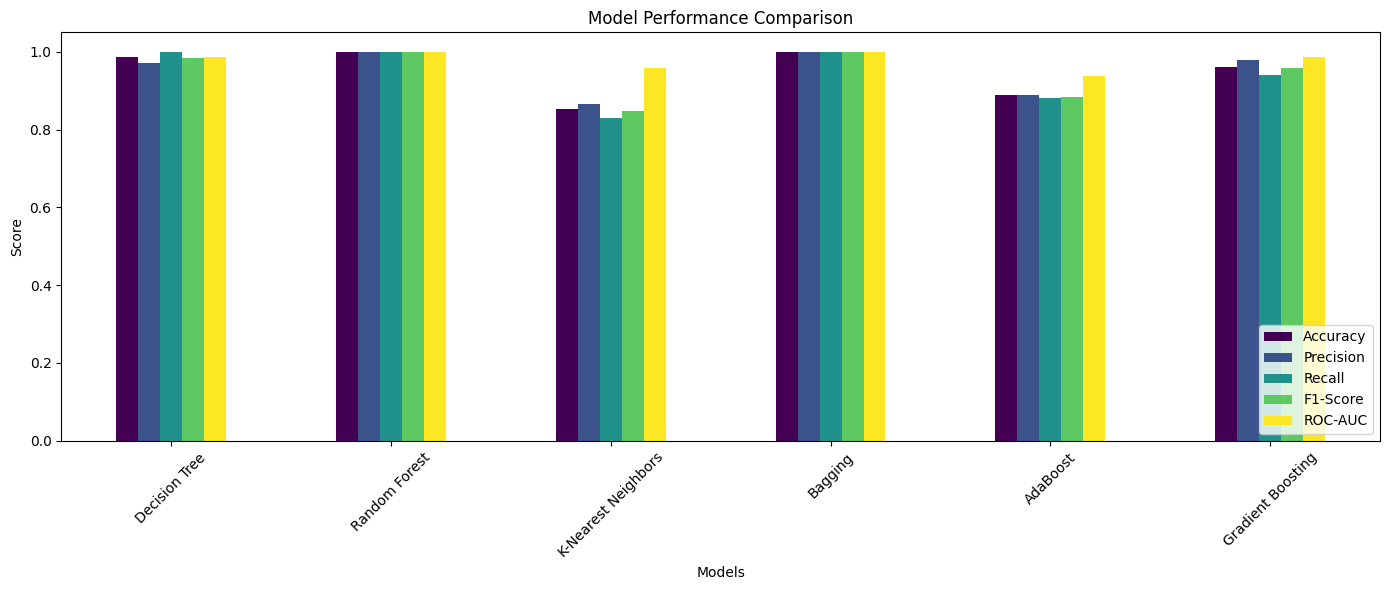

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    return accuracy, precision, recall, f1, roc_auc

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate each model and store performance
performance = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    performance[name] = evaluate_model(model, X_train, X_test, y_train, y_test, name)

# Create a performance DataFrame
performance_df = pd.DataFrame(performance, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']).T

# Plot performance metrics
plt.figure(figsize=(14, 8))
performance_df.plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Function to Load Data
@st.cache(allow_output_mutation=True)
def load_data():
    df = pd.read_csv('HeartDiseaseTrain-Test (1).csv')
    return df

# Function to Train and Save the Model
def train_and_save_model(df):
    # Drop unnecessary columns
    X = df.drop('target', axis=1)
    y = df['target']

    # Preprocessing: Label Encoding for categorical features
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), numerical_features),
            ('labelencoder', LabelEncoder(), categorical_features)
        ],
        remainder='passthrough'
    )

    # Create a pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Save the trained model
    joblib.dump(pipeline, 'heart_disease_model.pkl')

    # Evaluate the model
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    return accuracy, report

# Function to Load the Trained Model
@st.cache(allow_output_mutation=True)
def load_model():
    model = joblib.load('heart_disease_model.pkl')
    return model

# Streamlit Web Interface
st.title("Heart Disease Prediction App")

# Step 1: Load Data
df = load_data()
st.subheader("Dataset Preview")
st.write(df.head())

# Step 2: Visualize Data
st.write("### Target Distribution")
fig, ax = plt.subplots()
sns.countplot(x='target', data=df, ax=ax)
ax.set_title("Presence vs Absence of Heart Disease")
st.pyplot(fig)

# Step 3: Train the Model
st.subheader("Model Training")
if st.button("Train Model"):
    accuracy, report = train_and_save_model(df)
    st.success(f"Model Trained Successfully! Accuracy: {accuracy:.2f}")
    st.text("Classification Report:")
    st.text(report)

# Step 4: Load the Trained Model
model = None
try:
    model = load_model()
except:
    st.warning("Please train the model first by clicking the 'Train Model' button.")

# Step 5: Make Predictions
st.subheader("Make a Prediction")
if model:
    # Collect user input for prediction
    age = st.number_input('Age', min_value=0, max_value=120, value=50)
    sex = st.selectbox('Sex', ['Male', 'Female'])
    chest_pain_type = st.selectbox('Chest Pain Type', ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
    resting_bp = st.number_input('Resting Blood Pressure', min_value=0, value=120)
    chol = st.number_input('Cholesterol', min_value=0, value=200)
    fasting_bs = st.selectbox('Fasting Blood Sugar > 120 mg/dl', ['Yes', 'No'])
    rest_ecg = st.selectbox('Resting ECG', ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'])
    max_hr = st.number_input('Max Heart Rate Achieved', min_value=0, value=150)
    exercise_angina = st.selectbox('Exercise-Induced Angina', ['Yes', 'No'])
    oldpeak = st.number_input('ST Depression', min_value=0.0, value=1.0)
    slope = st.selectbox('Slope of the Peak Exercise', ['Upsloping', 'Flat', 'Downsloping'])
    vessels = st.selectbox('Number of Major Vessels', [0, 1, 2, 3, 4])
    thal = st.selectbox('Thalassemia', ['Normal', 'Fixed defect', 'Reversible defect'])

    if st.button("Predict Heart Disease"):
        # Prepare input data for prediction
        input_data = pd.DataFrame({
            'age': [age],
            'sex': [sex],
            'chest_pain_type': [chest_pain_type],
            'resting_blood_pressure': [resting_bp],
            'cholestoral': [chol],
            'fasting_blood_sugar': [fasting_bs],
            'rest_ecg': [rest_ecg],
            'Max_heart_rate': [max_hr],
            'exercise_induced_angina': [exercise_angina],
            'oldpeak': [oldpeak],
            'slope': [slope],
            'vessels_colored_by_flourosopy': [vessels],
            'thalassemia': [thal]
        })

        try:
            # Use the trained pipeline to transform and predict
            prediction = model.predict(input_data)[0]
            prediction_proba = model.predict_proba(input_data)[0][1]

            # Display result
            if prediction == 1:
                st.error(f"*Heart Disease Detected!* (Probability: {prediction_proba:.2f})")
            else:
                st.success(f"*No Heart Disease Detected.* (Probability: {1 - prediction_proba:.2f})")
        except Exception as e:
            st.error(f"Error during prediction: {e}")

Overwriting app.py


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!rm requirements.txt

In [ ]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib

In [ ]:
!cat requirements.txt

In [ ]:
!pip install -r requirements.txt